# Flow Cytometry analysis coinfection

Analysis of flow cytometry data in support of chromium pipeline. Single cells already gated using FlowJo, everything else to be done algorithmically

Initialize libraries

In [18]:
import sys
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import scipy.io
import pandas as pd
import seaborn as sns
import importlib
from scipy import stats
import statsmodels


import statsmodels
#set directory filepaths
workingDirectory = os.getcwd() + '/'


Initialize dataset and labels

In [19]:

datafile = 'HA_staining.tsv'
flowdataframe = pd.read_table(datafile)
fluorlabels = ['HA']
samples = ['Barcode', 'WT', 'HiDI', 'Uninfected']
flowdataframe = flowdataframe.rename(columns={'PerCP.Cy5.5.A': 'HA'})


Define gates for single positive and double-positive cells. Define on single-stain controls, but confirm numbers are consistent with double-negative sample

In [26]:

negsamp = ['Uninfected']
percentile = 0.995
cutoffs = {}

for sample in negsamp:
    sub = flowdataframe[flowdataframe.file == sample]
    for item in fluorlabels:
        print('For ' + sample + " " + str(percentile * 100) + ' percent of the cells have less than ' +
                 str(sub[item].quantile(percentile)) + ' of ' + item + ' signal')
        cutoffs[item] = sub[item].quantile(percentile)

For Uninfected 99.5 percent of the cells have less than 300.08001708984403 of HA signal


Report infection status, save reduced table with only flu+ cells

In [27]:

for sample in samples:
    sub = flowdataframe[flowdataframe.file==sample]
    total = len(sub)
    HApos = len(sub[sub['HA'] >= cutoffs['HA']])
    print("For sample {0}, with {1} cells, {2} percent are HA positive.".
         format(sample, total, round(100*float(HApos)/total,2)))


For sample Barcode, with 26686 cells, 4.19 percent are HA positive.
For sample WT, with 36455 cells, 2.14 percent are HA positive.
For sample HiDI, with 20854 cells, 89.22 percent are HA positive.
For sample Uninfected, with 47956 cells, 0.51 percent are HA positive.


Report graphs from flowjo using above values

Kernel density plots for single color, single color in coinfection, and dual-color in coinfection

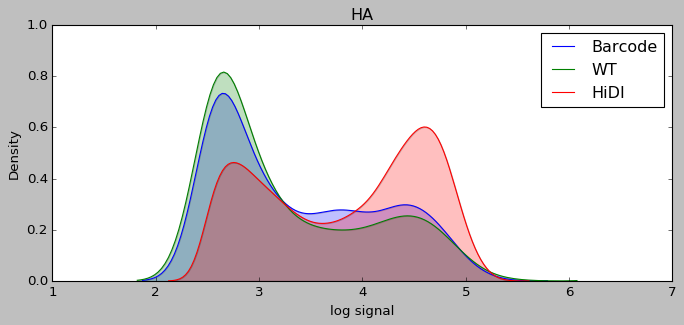

In [34]:
y = 1
infected = ['Barcode', 'WT', 'HiDI']
plt.figure(y, (10,4))
plt.style.use('classic')
for sample in infected:
    sub = flowdataframe[flowdataframe.file==sample]
    for label1 in fluorlabels:
        infect = sub[(sub[label1] > cutoffs[label1])][label1]
        #log transform for easier plotting and handling of bins - desire wider bins at higher values
        infect = np.log10(infect)
        x += 1
        sns.kdeplot(data = infect, shade = True, label=sample)
        plt.title(label1)
        plt.xlabel(label1)
        plt.ylabel('Density')
        plt.xlabel('log signal')
        plt.legend()
        plt.ylim(0,1)
plt.savefig(workingDirectory + 'all_distribution.pdf', format='pdf' )
        